
# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('tmdb-movies.csv')
#   types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       



### Data Cleaning (Replace this with more specific notes!)

In [3]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
#remove unused columns(homepage,tagline,keywords,vote_count,overview) 
df.drop(columns=['homepage','tagline','keywords','vote_count','overview'],axis=1,inplace=True)

In [5]:
#check changes
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
#check for duplicated entries
sum(df.duplicated())

1

In [7]:
#drop duplicated entries
df.drop_duplicates(inplace=True)

In [8]:
#check changes
sum(df.duplicated())

0

In [9]:
#check for null entries

df.isnull().any(axis=1).sum()

1095

In [10]:
#drop duplicated entries
df.dropna(inplace=True)

In [11]:
#check changes
df.isnull().any(axis=1).sum()

0

In [12]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9770 non-null   int64  
 1   imdb_id               9770 non-null   object 
 2   popularity            9770 non-null   float64
 3   budget                9770 non-null   int64  
 4   revenue               9770 non-null   int64  
 5   original_title        9770 non-null   object 
 6   cast                  9770 non-null   object 
 7   director              9770 non-null   object 
 8   runtime               9770 non-null   int64  
 9   genres                9770 non-null   object 
 10  production_companies  9770 non-null   object 
 11  release_date          9770 non-null   object 
 12  vote_average          9770 non-null   float64
 13  release_year          9770 non-null   int64  
 14  budget_adj            9770 non-null   float64
 15  revenue_adj         

In [14]:
#change release_date from string to date
pd.to_datetime(df['release_date'])

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, Length: 9770, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres are most released from year to year?)

In [15]:
#check max number of genres for every year
release_year=list(df['release_year'].unique())
MAX_released=[]
for year in release_year:
    dff=df[df['release_year']==year ]
    genres_li = dff['genres'].str.cat(sep = '|').split("|")
    genres=list(set(genres_li))
    genres_count=[genres_li.count(genre) for genre in genres]
    MAX_released.append(genres[genres_count.index(max(genres_count))])
dff=pd.DataFrame(MAX_released,release_year,columns=['his_released_genres'])
dff

,his_released_genres
2015,Drama
2014,Drama
1977,Drama
2009,Drama
2010,Drama
1999,Drama
2001,Comedy
2008,Drama
2011,Drama
2002,Drama


# when we see the genres are most released from year to year,we can release that most of years focused on Drama 

### Research Question 2  (Which year has the highest release of movies?)

In [16]:
#check year has the highest release 
df['release_date'].groupby(pd.DatetimeIndex(df['release_date']).year).count().idxmax()


2014

Text(0, 0.5, 'Num_of_released_movies')

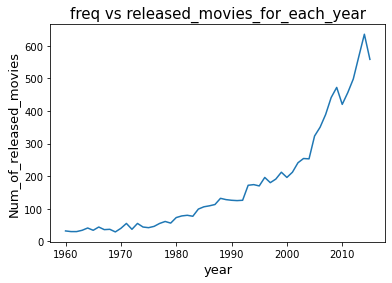

In [17]:
#plot freq of movies for every year
df.groupby(df['release_year']).count()['id'].plot()
plt.title('freq vs released_movies_for_each_year',fontsize = 15)
plt.xlabel('year',fontsize = 13)
plt.ylabel('Num_of_released_movies',fontsize = 13)


# 2014 is the best year for movies , it has the highest number of release of movies

### Research Question 3  (Which Director Who Directs Maximum Movies?)

In [18]:
#check max number of movies for every director
df['director'].groupby(df['director']).count().idxmax()
directors_li = df['director'].str.cat(sep = '|').split("|")
directors=set(directors_li)
directors_count=[directors_li.count(director) for director in directors]
dff=pd.DataFrame(directors_count,directors,columns=['his_released_Movies'])
dff[dff['his_released_Movies']==max(dff['his_released_Movies'])]

,his_released_Movies
Woody Allen,43


# Now we can know that Woody Allen Directs Maximum Movies, he's direct 43 movies ,he has large experience 

### Research Question 4 (Which company With Higher Number Of Release)

In [19]:
#check max number of movies for every production companies
production_companies_li = df['production_companies'].str.cat(sep = '|').split("|")
production_companies=set(production_companies_li)
production_companies_count=[production_companies_li.count(P_C) for P_C in production_companies]
dff=pd.DataFrame(production_companies_count,production_companies,columns=['his_released_Movies'])
dff[dff['his_released_Movies']==max(dff['his_released_Movies'])]


,his_released_Movies
Universal Pictures,522


# from this we can know that Universal Pictures has the highest Number Of Release it released 522 movies 

### Research Question 5 (what the budget of most popular Movie? )

In [20]:
#search for most popular Movie and found his budget
dff=df[df['popularity']==max(df['popularity'])]
dff[['original_title','budget']]


,original_title,budget
0,Jurassic World,150000000


# Now we can release that the most popular Movie has a large budget is 150000000

### Research Question 6 (Which movie get the highest or lowest vote average ?)

In [21]:
#search for highest or lowest vote average

dff_max=df[df['vote_average']==max(df['vote_average'])]
dff_min=df[df['vote_average']==min(df['vote_average'])]
print(dff_max[['original_title','vote_average']])
print(dff_min[['original_title','vote_average']])


         original_title  vote_average
6911  Pink Floyd: Pulse           8.7
                 original_title  vote_average
7772              Transmorphers           1.5
10865  Manos: The Hands of Fate           1.5


# now we can know that Pink Floyd: Pulse has th highest vote average 

### Research Question 7 (Which movie made the highest revenue and lowest ?)

In [22]:
#search for highest or lowest revenue

dff_max=df[df['revenue']==max(df['revenue'])]
dff_min=df[df['revenue']==min(df['revenue'])]
print(dff_max[['original_title','revenue']])
print(dff_min[['original_title','revenue']].head())


     original_title     revenue
1386         Avatar  2781505847
                    original_title  revenue
48                       Wild Card        0
67                        Survivor        0
74          Mythica: The Darkspore        0
75  Me and Earl and the Dying Girl        0
92        Mythica: The Necromancer        0


# Avatar has the highest revenue it's the best movie  

### Research Question 8 (Which Month has the highest release of movies?)

In [23]:
#found month that has the highest release of movies
df['release_date'].groupby(pd.DatetimeIndex(df['release_date']).month).count().idxmax()


9

Text(0, 0.5, 'Num_of_released_movies')

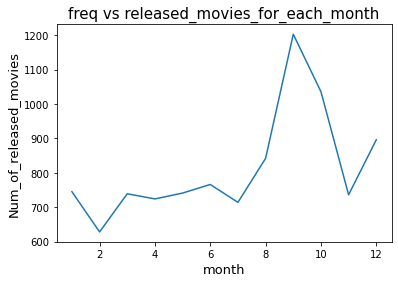

In [24]:
#plot freq of released movies for every month
df.groupby(pd.DatetimeIndex(df['release_date']).month).count()['id'].plot()
plt.title('freq vs released_movies_for_each_month',fontsize = 15)
plt.xlabel('month',fontsize = 13)
plt.ylabel('Num_of_released_movies',fontsize = 13)


# now we can see december is most popular month for releasing movies, if you want to earn more profit.

### Research Question 9 (Average Runtime Of Movies From Year To Year?)

In [25]:
#calculate avg runtime of movies for every year
year_li=list(df['release_year'].unique())
Avg_runtime=[]
for year in year_li:
    dff=df[df['release_year']==year ]
    runtime=list(dff['runtime'])
    Avg_runtime.append(sum(runtime)/len(runtime))
dff=pd.DataFrame(Avg_runtime,year_li,columns=['Avg_runtime'])

Text(0, 0.5, 'year')

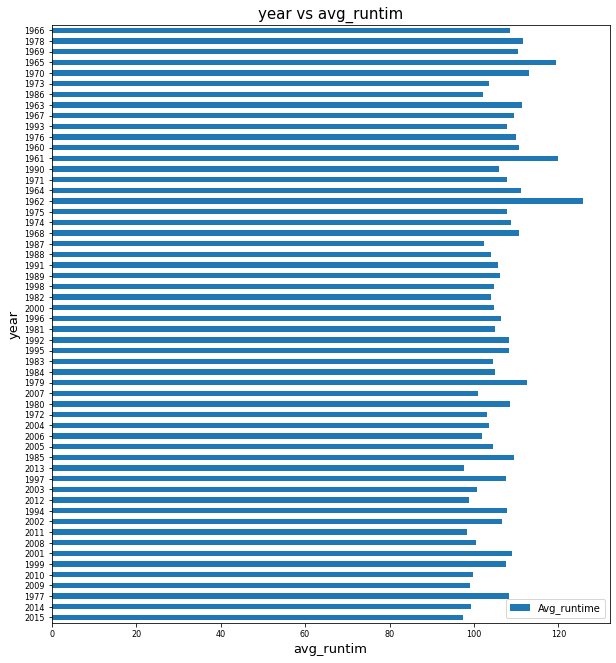

In [26]:
#plot for avg runtim for every year
dff.plot(kind='barh',figsize=(10,11),fontsize=8)
plt.title('year vs avg_runtim',fontsize = 15)
plt.xlabel('avg_runtim',fontsize = 13)
plt.ylabel('year',fontsize = 13)

# now we can release that 1962 is year has the most Average Runtime Of Movies

### Research Question 10 (Which Genre Has The Highest Release Of Movies?)

In [27]:
#count each Genre and found max
genre_li = df['genres'].str.cat(sep = '|').split("|")
genres=set(genre_li)
genres_count=[genre_li.count(genre) for genre in genres]
dff=pd.DataFrame(genres_count,genres,columns=['Max_release_genres'])

Text(0, 0.5, 'genres')

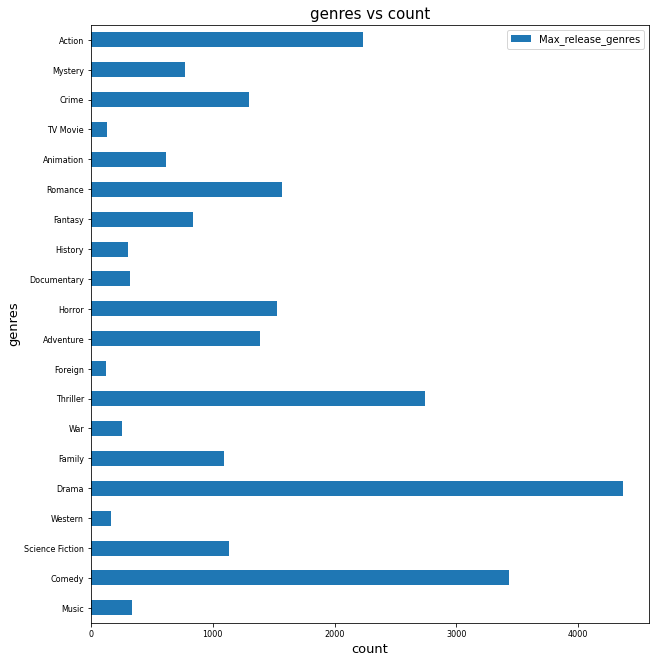

In [28]:
#plot the freq for genres for all movies
dff.plot(kind='barh',figsize=(10,11),fontsize=8)
plt.title('genres vs count',fontsize = 15)
plt.xlabel('count',fontsize = 13)
plt.ylabel('genres',fontsize = 13)


# now we can release that the most popular genre is Drama following by action, comedy and thriller

### Research Question 11 (Which Star Has The Highest Release Of Movies?)

In [29]:
#count each star in all movies an found max
stars_li = df['cast'].str.cat(sep = '|').split("|")
stars=set(stars_li)
stars_count=[stars_li.count(star) for star in stars]
dff=pd.DataFrame(stars_count,stars,columns=['his_released_Movies'])
dff[dff['his_released_Movies']==max(dff['his_released_Movies'])]


,his_released_Movies
Robert De Niro,72


# now we can know that Robert De Niro is the Star who Has The Highest Release Of Movies

<a id='conclusions'></a>
## Conclusions
>1) 2014 has the highest release of movies

>2) Director:- Woody Allen Directs Maximum Movies (43 movies)

>3) Universal Pictures company With Higher Number Of Release (522 movies)

>4) budget of most popular Movie = 150000000 (Jurassic World)

>5) Pink Floyd: Pulse get the highest 8.7 , Transmorphers and Manos: The Hands of Fate get lowest vote average 1.5

>6)Avatar made the highest revenue 2781505847 , Wild Card and Survivor made the lowest revenue 0

>7)December has the highest release of movies

>8)1962 has most Average Runtime Of Movies

>9)Drama Has The Highest Released Of genres

>10)star:- Robert De Niro Has The Highest Release Of Movies (72 movies)

### Limitations
>1)I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.

>2)During the data cleaning process,I droped duplicated and null entries 

>3)During the data cleaning process,I removed unused columns (homepage ,tagline ,keywords ,vote_count ,overview ) ,perhaps those columns be useful for anybody else 
